In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random 
from numpy import random as rd
from sklearn.linear_model import LinearRegression

In [2]:
Demand_Provided_all = pd.read_excel('Demand-Information-670-1460.xlsx',sheet_name = 'Demand-Provided-All')
Demand_Provided_670_after = pd.read_excel('Demand-Information-670-1460.xlsx',sheet_name = 'Demand-Provided-670-1361')

# Reading Calopeia 

In [3]:
demand_total_Calopeia =  Demand_Provided_all['Demand for Calopeia']
demand_total_Calopeia = demand_total_Calopeia[30:].tolist()

# Forcasting Sorange

In [4]:
day_provided_Sorange = Demand_Provided_all.dropna().index.values.reshape((-1, 1))
demand_provided_Sorange = np.array(Demand_Provided_all['Demand for Sorange'].dropna())

In [5]:
model = LinearRegression()
model.fit(day_provided_Sorange, demand_provided_Sorange)

LinearRegression()

In [6]:
day_forcast_Sorange = Demand_Provided_all[Demand_Provided_all['Demand for Sorange'].isna()].index.values.reshape(-1, 1)
demand_forcast_Sorange = model.predict(day_forcast_Sorange)

In [7]:
m1 = demand_forcast_Sorange.mean()
m2 = demand_forcast_Sorange.mean()
s1 = demand_forcast_Sorange.std()
s2 = demand_provided_Sorange.std()

In [8]:
demand_total_Sorange = demand_provided_Sorange.tolist()[30:] + demand_forcast_Sorange.tolist()

# Forcasting Tyran

In [9]:
demand_provided_Tyran = Demand_Provided_670_after['Demand for Tyran'].dropna().to_list()

day_forcast_Tyran = Demand_Provided_all[Demand_Provided_all['Demand for Tyran'].isna()].index.values.reshape(-1, 1)

max_demand_Tyran = max(demand_provided_Tyran)
min_demand_Tyran = min(demand_provided_Tyran)

In [10]:
mu = 17.26
sigma = 16.02
nums = [] 
for i in range(len(day_forcast_Tyran)): 
    num = min(max_demand_Tyran, max(min_demand_Tyran, random.gauss(mu, sigma)))
    nums.append(num) 

In [11]:
len(demand_provided_Tyran)

692

In [12]:
demand_forcast_Tyran = nums
demand_total_Tyran = demand_provided_Tyran + demand_forcast_Tyran

# Forcasting Entworpe

In [13]:
demand_provided_Entworpe = Demand_Provided_670_after['Demand for Entworpe'].dropna().to_list()
demand_forcast_Entworpe = Demand_Provided_670_after[Demand_Provided_670_after['Demand for Entworpe'].isna()]['Demand for Entworpe']

day_provided_Entworpe = len(demand_provided_Entworpe)
day_total_Entworpe = len(Demand_Provided_670_after['Demand for Entworpe'])
day_forcast_Entworpe = len(demand_forcast_Entworpe)

In [14]:
p =28/518
n = day_forcast_Entworpe

In [15]:
demand_forcast_Entworpe = rd.binomial(n=1, p=p, size=day_forcast_Entworpe)
demand_forcast_Entworpe = demand_forcast_Entworpe*250
demand_forcast_Entworpe = demand_forcast_Entworpe.tolist()
demand_total_Entworpe = demand_provided_Entworpe + demand_forcast_Entworpe

# Forcasting Fardo

In [16]:
demand_provided_Fardo = Demand_Provided_670_after['Demand for Fardo'].dropna().to_list()
day_forcast_Fardo = Demand_Provided_all[Demand_Provided_all['Demand for Fardo'].isna()].index.values.reshape(-1, 1)
max_demand_Fardo = max(demand_provided_Fardo)
min_demand_Fardo = min(demand_provided_Fardo)


In [17]:
mu = 16.99
sigma = 16.26
nums = [] 
for i in range(len(day_forcast_Fardo)): 
    num = min(max_demand_Fardo, max(min_demand_Fardo, random.gauss(mu, sigma)))
    nums.append(num)

In [18]:
demand_forcast_Fardo = nums
demand_total_Fardo = demand_provided_Fardo + demand_forcast_Fardo

# Calculating the total demand

# Combining all demand forcast

In [19]:
len(demand_total_Fardo)

791

In [20]:
day = Demand_Provided_670_after.day
data_demand = {'day':day,'Demand for Calopeia':demand_total_Calopeia,'Demand for Sorange':demand_total_Sorange,'Demand for Tyran':demand_total_Tyran,'Demand for Entworpe':demand_total_Entworpe,'Demand for Fardo':demand_total_Fardo}

In [21]:
Demand_only_forcast = pd.DataFrame(data = data_demand)
Demand_only_forcast.to_csv('Demand_only_forcast.csv')

In [22]:
Demand_only_forcast['Demand for CSTE'] = Demand_only_forcast.apply(lambda row: row['Demand for Calopeia']+row['Demand for Sorange']+row['Demand for Tyran']+row['Demand for Entworpe'],axis=1)
Demand_only_forcast['Seven Day Average for CSTE'] = Demand_only_forcast['Demand for CSTE'].rolling(window=7).mean().shift(-3)

# Visualizing all points

In [30]:
day_provided = 1361
days_provided = list(range(670,day_provided+1))
days_forcasted = list(range(day_provided+1,1461))

In [31]:
Demand_for_Sorange_provided = Demand_only_forcast[Demand_only_forcast.day <= day_provided]['Demand for Sorange']
Demand_for_Tyran_provided = Demand_only_forcast[Demand_only_forcast.day <= day_provided]['Demand for Tyran']
Demand_for_Entworpe_provided = Demand_only_forcast[Demand_only_forcast.day <= day_provided]['Demand for Entworpe']
Demand_for_Fardo_provided = Demand_only_forcast[Demand_only_forcast.day <= day_provided]['Demand for Fardo']

Demand_for_Sorange_forcasted = Demand_only_forcast[Demand_only_forcast.day > day_provided]['Demand for Sorange']
Demand_for_Tyran_forcasted = Demand_only_forcast[Demand_only_forcast.day > day_provided]['Demand for Tyran']
Demand_for_Entworpe_forcasted = Demand_only_forcast[Demand_only_forcast.day > day_provided]['Demand for Entworpe']
Demand_for_Fardo_forcasted = Demand_only_forcast[Demand_only_forcast.day > day_provided]['Demand for Fardo']


Demand_for_C_S_T_E_provided = Demand_only_forcast[Demand_only_forcast.day <= day_provided]['Seven Day Average for CSTE']
Demand_for_C_S_T_E_forcasted = Demand_only_forcast[Demand_only_forcast.day > day_provided]['Seven Day Average for CSTE']



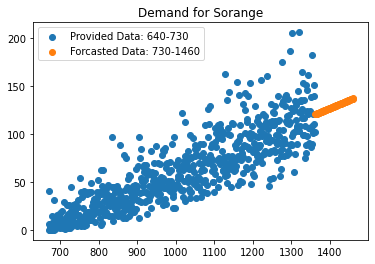

In [32]:
plt.scatter(days_provided,Demand_for_Sorange_provided,label='Provided Data: 640-730')
plt.scatter(days_forcasted,Demand_for_Sorange_forcasted,label='Forcasted Data: 730-1460')
plt.title('Demand for Sorange')
plt.legend()

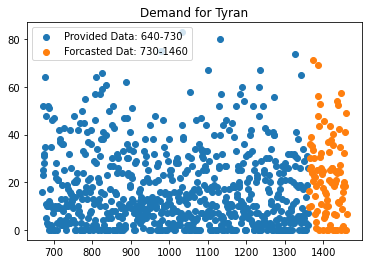

In [33]:
plt.scatter(days_provided,Demand_for_Tyran_provided,label='Provided Data: 640-730')
plt.scatter(days_forcasted,Demand_for_Tyran_forcasted,label='Forcasted Dat: 730-1460')
plt.title('Demand for Tyran')
plt.legend()

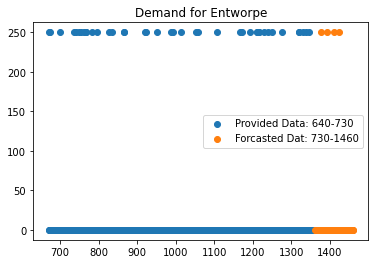

In [34]:
plt.scatter(days_provided,Demand_for_Entworpe_provided,label='Provided Data: 640-730')
plt.scatter(days_forcasted,Demand_for_Entworpe_forcasted,label='Forcasted Dat: 730-1460')
plt.title('Demand for Entworpe')
plt.legend()

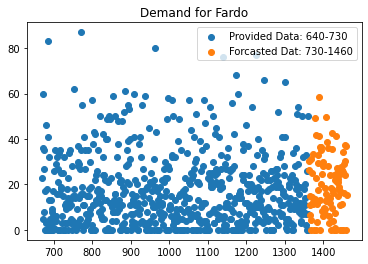

In [37]:
plt.scatter(days_provided,Demand_for_Fardo_provided,label='Provided Data: 640-730')
plt.scatter(days_forcasted,Demand_for_Fardo_forcasted,label='Forcasted Dat: 730-1460')
plt.title('Demand for Fardo')
plt.legend()

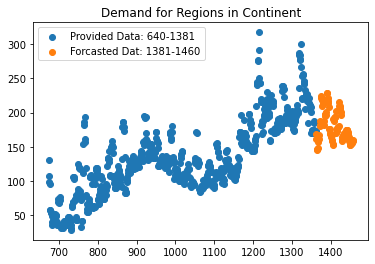

In [39]:
plt.scatter(days_provided,Demand_for_C_S_T_E_provided,label='Provided Data: 640-1381')
plt.scatter(days_forcasted,Demand_for_C_S_T_E_forcasted,label='Forcasted Dat: 1381-1460')
plt.title('Demand for Regions in Continent')
plt.legend()